In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
df=pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [19]:
df["Formatted Date"]=pd.to_datetime(df["Formatted Date"],utc=True)
df["Year"]=df["Formatted Date"].dt.year
df["dayofyear"]=df["Formatted Date"].dt.dayofyear
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,dayofyear
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91


In [20]:
df=df.groupby(['Year','dayofyear'])["Temperature (C)"].mean().reset_index()
df.isnull().sum()

Year               0
dayofyear          0
Temperature (C)    0
dtype: int64

In [21]:
X=df["dayofyear"].values
Y=df["Temperature (C)"].values
X_train,X_test,Y_train,Y_test=train_test_split(X.reshape(-1,1),Y.reshape(-1,1))
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3014, 1), (1005, 1), (3014, 1), (1005, 1))

In [44]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,activation="relu"),
                                tf.keras.layers.Dense(500,activation="relu"),
                                tf.keras.layers.Dense(100,activation="relu"),
                                tf.keras.layers.Dense(10,activation="relu"),
                                tf.keras.layers.Dense(1,activation="linear")
])


In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="mae")

In [46]:
output=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
95/95 [==============================] - 1s 2ms/step - loss: 8.7923
Epoch 2/500
95/95 [==============================] - 0s 2ms/step - loss: 8.4218
Epoch 3/500
95/95 [==============================] - 0s 2ms/step - loss: 8.1833
Epoch 4/500
95/95 [==============================] - 0s 2ms/step - loss: 8.0753
Epoch 5/500
95/95 [==============================] - 0s 2ms/step - loss: 8.0088
Epoch 6/500
95/95 [==============================] - 0s 2ms/step - loss: 7.8129
Epoch 7/500
95/95 [==============================] - 0s 2ms/step - loss: 7.7907
Epoch 8/500
95/95 [==============================] - 0s 2ms/step - loss: 7.3954
Epoch 9/500
95/95 [==============================] - 0s 2ms/step - loss: 6.9765
Epoch 10/500
95/95 [==============================] - 0s 2ms/step - loss: 6.1102
Epoch 11/500
95/95 [==============================] - 0s 2ms/step - loss: 5.4765
Epoch 12/500
95/95 [==============================] - 0s 2ms/step - loss: 5.0945
Epoch 13/500
95/95 [=================

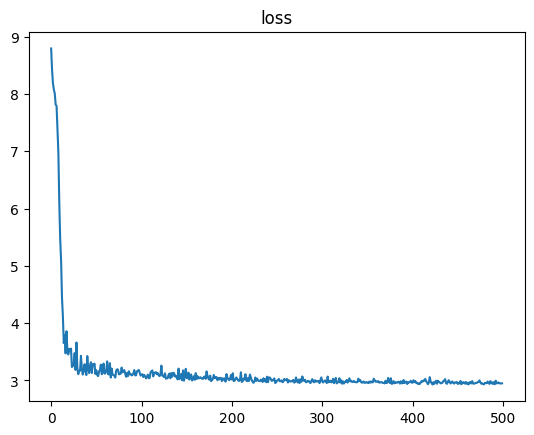

In [47]:
plt.plot(output.history["loss"])
plt.title("loss")
plt.show()

4/4 [==============================] - 0s 3ms/step


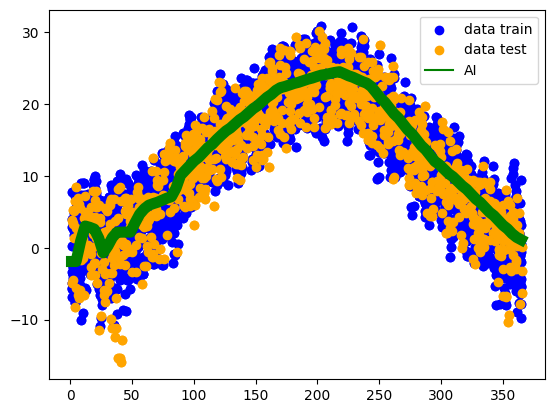

In [51]:
x=np.linspace(1,365,100)
x.reshape(100,1)
y=model.predict(x)
plt.scatter(X_train,Y_train,color="blue")
plt.scatter(X_test,Y_test,color="orange")
plt.plot(x,y,linewidth=8,color="green")
#legend
plt.scatter(X_train,Y_train,c="blue",label="data train")
plt.scatter(X_test,Y_test,c="orange",label="data test")
plt.plot(x,y,c="green",label="AI")
plt.legend()
plt.show()

In [52]:
model.evaluate(X_test,Y_test)

32/32 [==============================] - 0s 987us/step - loss: 3.1925


3.192523241043091

In [53]:
model.save("weather.h5")